In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
U = 1
D = 30
mu = 1
c = 1
M = U/c
Re= U*D/mu * 0.05
Re

1.5

In [191]:
y = np.linspace(0, D-1, D)
x = np.linspace(0, D-1, D)
X, Y = np.meshgrid(x, y)

print(np.shape(X), np.shape(Y))
rho = np.ones(np.shape(X))

rho_u = (X**2 - Y**2 - 4 )* rho
rho_v = (2*X*Y) * rho






print(np.shape(rho_u))

dx = x[1] - x[0]
dy = y[1] - y[0]

dt = 0.001 * 0.9*M*dx / np.sqrt(2)
dt

(30, 30) (30, 30)
(30, 30)


0.0006363961030678928

In [192]:
c1 = dt/dx
c2 = dt/dy
c3 = dt/(dx*M**2)
c4 = dt/(dy*M**2)
c5 = 4*dt/(3*Re*dx**2)
c6 = dt/(Re*dy**2)
c7 = dt/(Re*dx**2)
c8 = 4*dt/(3*Re*dy**2)
c9 = dt/(12*Re*dx*dy)
c10 = 2*(c5+c6)
c11 = 2*(c7+c8)

In [193]:
np.shape(rho[1:-1, 1:-1])

(28, 28)

In [194]:
def update_step(rho, rho_u, rho_v):
    #Step 1
    u = rho_u / rho
    v = rho_v / rho
    
    rho_new = np.zeros_like(rho)
    rho_u_new = np.zeros_like(rho_u)
    rho_v_new = np.zeros_like(rho_v)
    rho_final = np.zeros_like(rho)
    rho_u_final = np.zeros_like(rho_u)
    rho_v_final = np.zeros_like(rho_v)

    
    #Step 2
    rho_new[1:-1, 1:-1] = (rho[1:-1, 1:-1] - c1*(rho_u[1:-1, 1 +1:] - rho_u[1:-1, 1:-1]) 
                           - c2*(rho_v[1+1:, 1:-1] - rho_v[1:-1, 1:-1]))
    
    rho_u_new[1:-1, 1:-1] = (rho_u[1:-1, 1:-1] - c3*(rho[1:-1, 1+1:] - rho[1:-1, 1:-1]) 
                             -c1*(rho_u[1:-1, 1+1:]*u[1:-1, 1+1:] - rho_u[1:-1, 1:-1]*u[1:-1, 1:-1])
                            +c6*(u[1+1:, 1:-1] + u[1-1:-1-1, 1:-1] )
                        + c9 * (v[1+1:, 1+1:] + v[1-1:-1-1, 1-1:-1-1] - v[1-1:-1-1, 1+1:] - v[1+1:, 1-1:-1-1]))
    
    rho_v_new[1:-1, 1:-1] = (rho_v[1:-1, 1:-1] - c4*(rho[1+1:, 1:-1] -rho[1:-1, 1:-1]) 
                             - c1*(rho_u[1:-1, 1+1:]*v[1:-1, 1+1:] - rho_u[1:-1, 1:-1]*v[1:-1, 1:-1])
                            -c2 * (rho_v[1+1:, 1:-1]*v[1+1:, 1:-1] - rho[1:-1, 1:-1]*v[1:-1, 1:-1])
                            -c11 * v[1:-1, 1:-1] + c7 * (v[1:-1, 1+1:] + v[1:-1, 1-1:-1-1])
                            + c8*(v[1+1:, 1:-1] + v[1-1:-1-1, 1:-1]) 
                        + c9 * (u[1+1:, 1+1:] + u[1-1:-1-1, 1-1:-1-1] - u[1-1:-1-1, 1+1:] - u[1+1:, 1-1:-1-1]))
    
    #Step 3 (Boundary condition)
    
    #front
    rho_new[:,0] = rho[:,0] - dt/(2*dx)*(-np.roll(rho_u[:,0], 2) + 4*np.roll(rho_u[:,0], 1) - 3*rho_u[:,0])

    #back
    rho_new[:,-1] = rho[:,-1] + dt/(2*dx)*(-np.roll(rho_u[:,0], -2) + 4*np.roll(rho_u[:,0], -1) - 3*rho_u[:,0]) 
    
    #top
    rho_new[-1,:] = (rho[-1,:] - dt*U/(2*dx) * (np.roll(rho[-1,:], 1) - np.roll(rho[-1,:], -1)) + 
                    dt/(2*dy)*(-rho_v[-3,:] + 4*rho_v[-2,:]-3*rho_v[-1,:]))
    
    #bottom
    rho_new[0,:] = (rho[0,:] - dt/(2*dy)*(-rho_v[2,:] + 4*rho_v[1,:]-3*rho_v[0,:]))
    
    
    #step 4
    u_new = rho_u_new/rho_new
    v_new = rho_v_new/rho_new
    
    
    #step 5
    rho_final[1:-1, 1:-1] = 1/2 * ((rho[1:-1, 1:-1] + rho_new[1:-1, 1:-1]) - c1 * ( rho_u_new[1:-1, 1:-1] - rho_u_new[1:-1, 1-1:-1-1])
                       -c2*(rho_v_new[1:-1, 1:-1] - rho_v_new[1-1:-1-1, 1:-1]))
                       
    rho_u_final[1:-1, 1:-1] = 1/2 * (rho_u[1:-1, 1:-1] + rho_u_new[1:-1, 1:-1] - c3 * (rho_new[1:-1, 1:-1] - rho_new[1:-1, 1-1:-1-1])
                        - c1 * (rho_u_new[1:-1, 1:-1]*u_new[1:-1, 1:-1] - rho_u_new[1:-1, 1-1:-1-1]*u_new[1:-1, 1-1:-1-1])
                        - c2 * (rho_u_new[1:-1, 1:-1]*v_new[1:-1, 1:-1] - rho_u_new[1-1:-1-1, 1:-1]*v_new[1-1:-1-1, 1:-1])
                        - c10 * u_new[1:-1, 1:-1] + c5 * (u_new[1:-1, 1+1:] + u_new[1:-1, 1-1:-1-1]) 
                        + c6 * (u_new[1+1:, 1:-1] + u_new[1-1:-1-1, 1:-1])
                        + c9 * (v_new[1+1:, 1+1:] + v_new[1-1:-1-1, 1-1:-1-1] - v_new[1+1:, 1-1:-1-1] 
                                - v_new[1-1:-1-1, 1+1:]))
                       
    rho_v_final[1:-1, 1:-1] = 1/2 * (rho_v[1:-1, 1:-1] + rho_v_new[1:-1, 1:-1] - c4 * (rho_new[1:-1, 1:-1] - rho_new[1-1:-1-1, 1:-1])
                        - c1 * (rho_u_new[1:-1, 1:-1]*v_new[1:-1, 1:-1] - rho_u_new[1:-1, 1-1:-1-1]*v_new[1:-1, 1-1:-1-1])
                        + c8 * (v_new[1+1:, 1:-1] + v_new[1-1:-1-1, 1:-1])
                        + c9 * (u_new[1+1:, 1+1:] + u_new[1-1:-1-1, 1-1:-1-1] - u_new[1+1:, 1-1:-1-1] 
                                - u_new[1-1:-1-1, 1+1:]))
 
                       
    #Step 6 (Boundary condition)
    #top:
    rho_final[-1,:] = (rho[-1,:] + rho_new[-1,:] - dt*U/(2*dx)*(np.roll(rho_new[-1,:], 1) - np.roll(rho_new[-1,:], -1)) + 
                        dt/(2*dy)*(-rho_v_new[-3,:] + 4*rho_v_new[-2,:]-3*rho_v_new[-1,:]))
    rho_final[-1,:] = rho_final[-1,:]/2
    
    #bottom
    rho_final[0,:] = (rho[0,:] + rho_new[0,:] - dt/(2*dy)*(-rho_v_new[2,:] + 4*rho_v_new[1,:]-3*rho_v_new[0,:]))
    rho_final[0,:] = rho_final[0,:]/2
    
    
    #front
    rho_final[:,0]=rho[:,0] + rho_new[:,0] - dt/(2*dx) * (-np.roll(rho_u_new[:,0], 2) + 4*np.roll(rho_u_new[:,0], 1) - 3*rho_u_new[:,0])
    
    #back
    rho_final[:,-1]=rho[:,-1] + rho_new[:,-1] + dt/(2*dx)*(-np.roll(rho_u_new[:,-1], -2) + 4*np.roll(rho_u_new[:,-1], -1) - 3*rho_u_new[:,-1])
                       
    
    return rho_final, rho_u_final, rho_v_final
    
    
    
    
        

In [195]:
def loop(rho, rho_u, rho_v):
    plt.figure()

    for i in range(100):
        rho, rho_u, rho_v = update_step(rho, rho_u, rho_v)
        
        plt.imshow(rho)
        plt.quiver(X, Y, rho_u/rho, rho_v/rho)
        plt.draw()
        plt.pause(0.01)
        plt.clf()

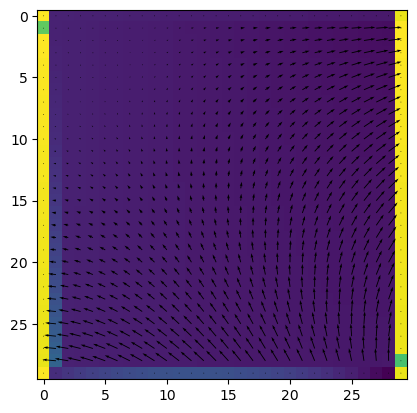

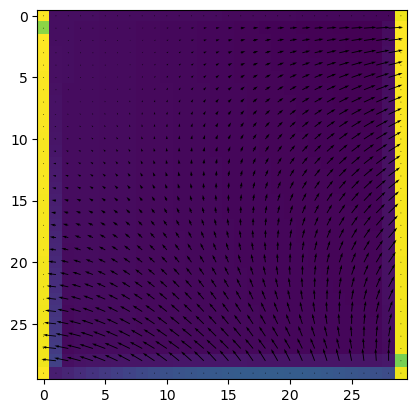

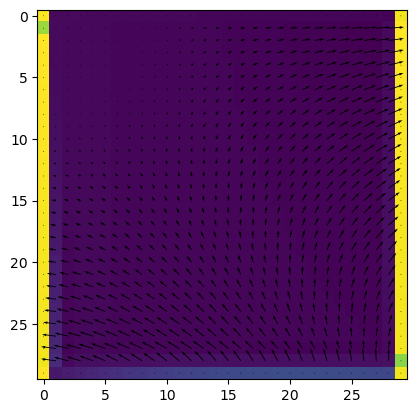

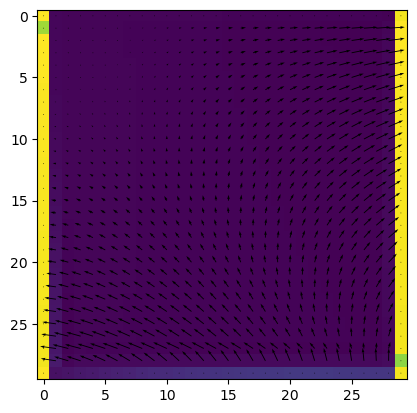

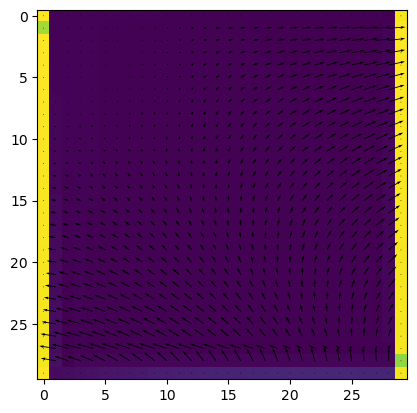

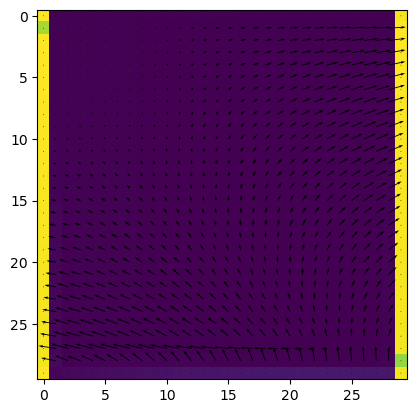

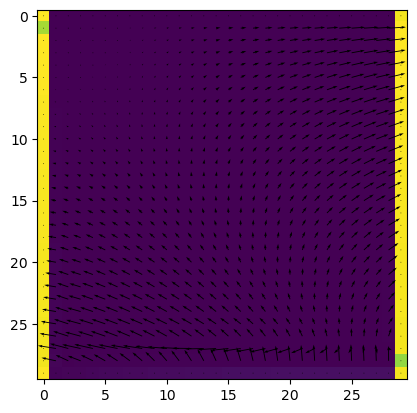

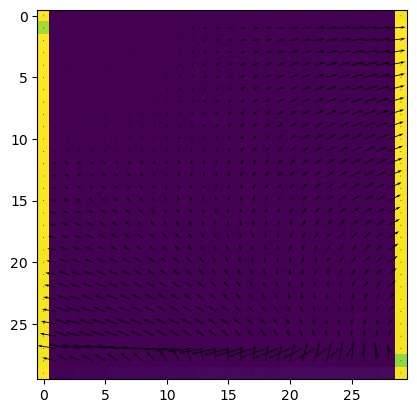

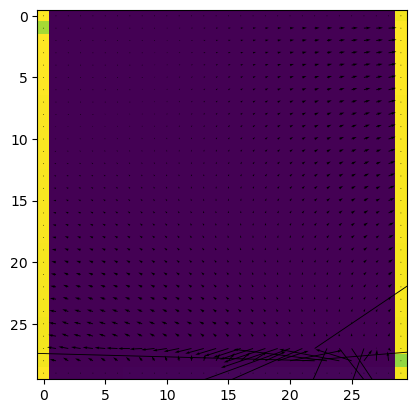

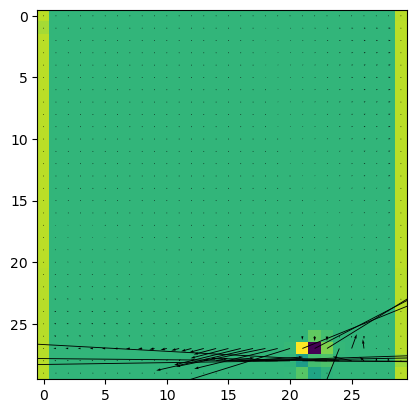

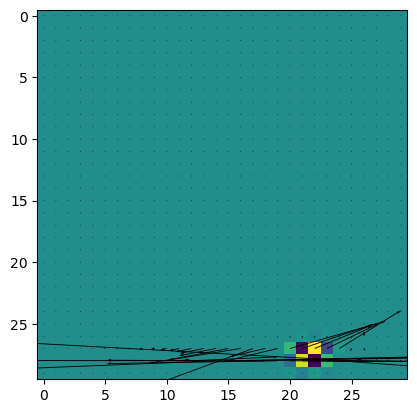

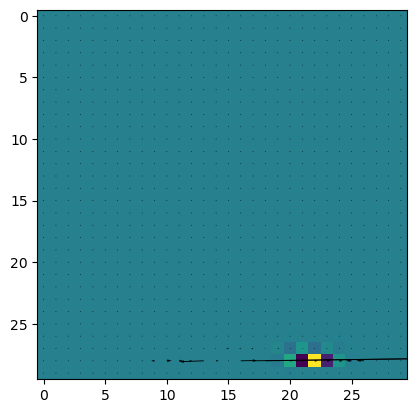

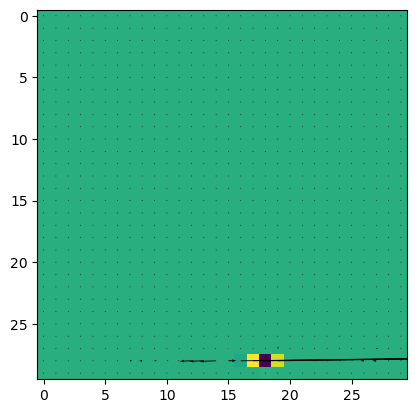

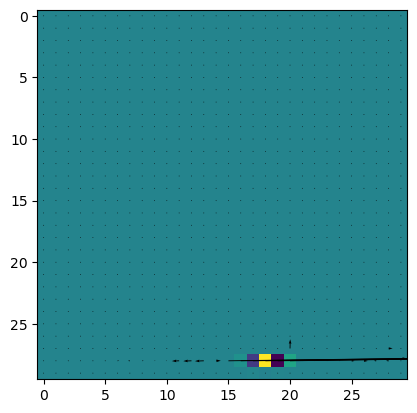

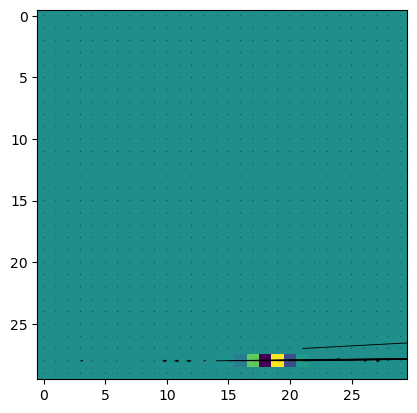

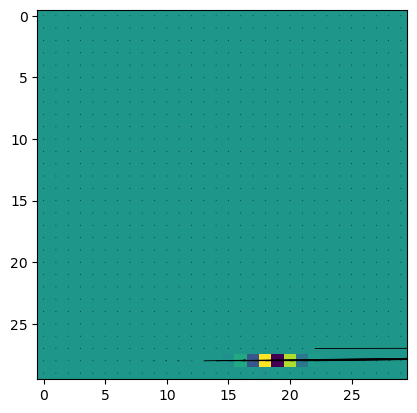

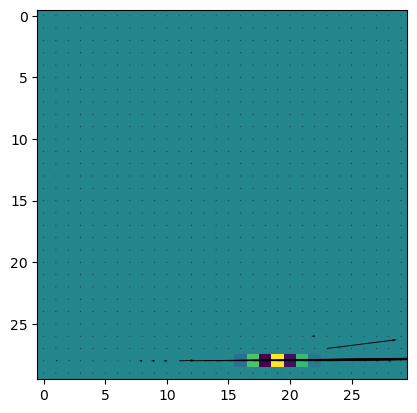

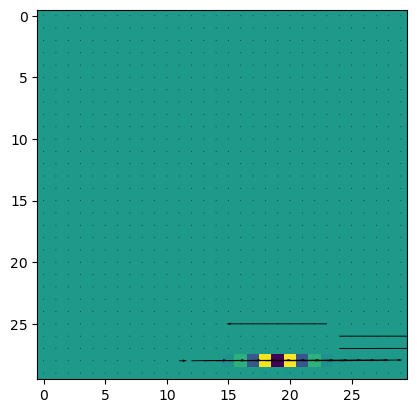

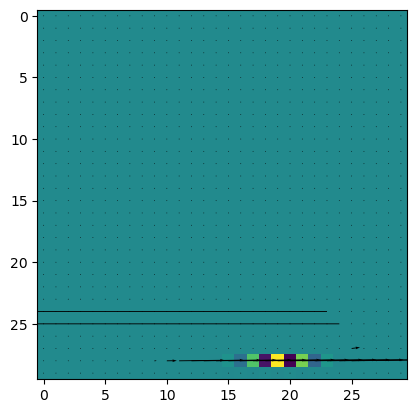

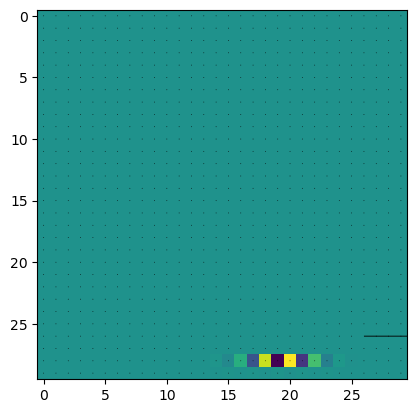

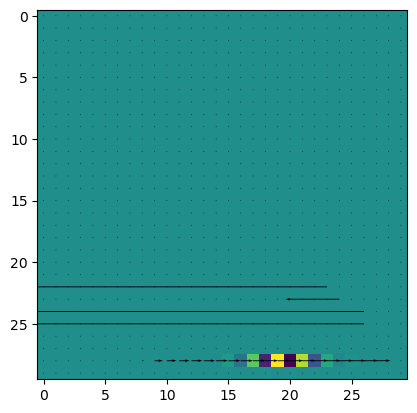

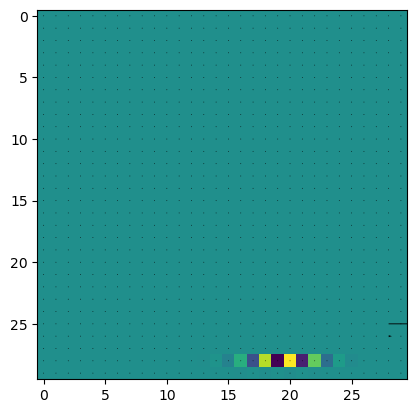

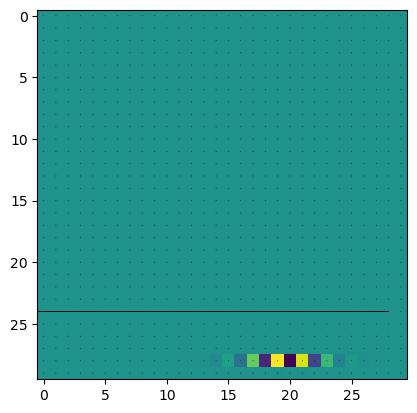

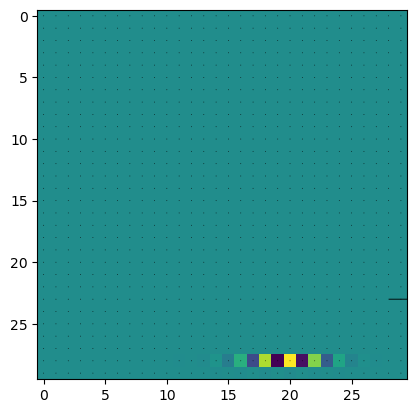

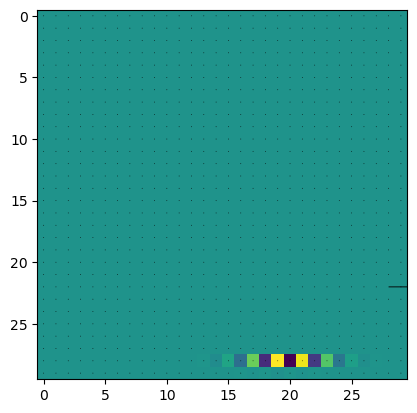

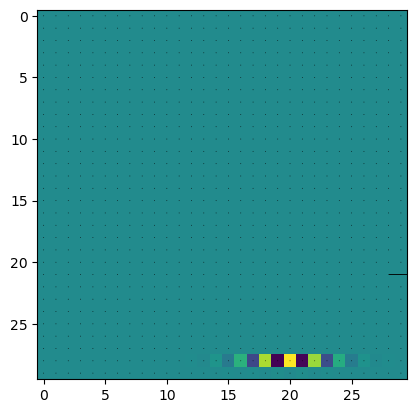

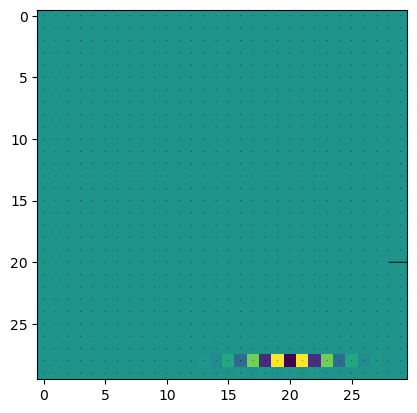

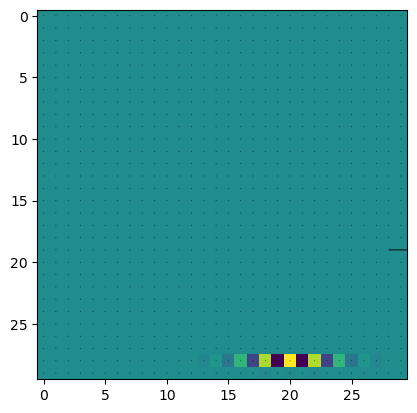

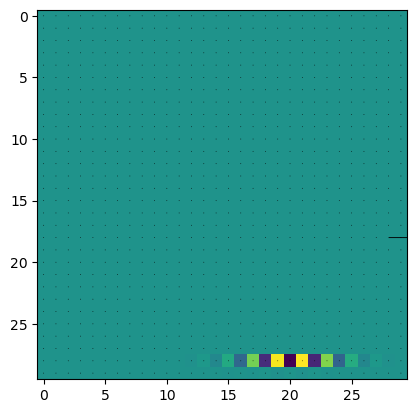

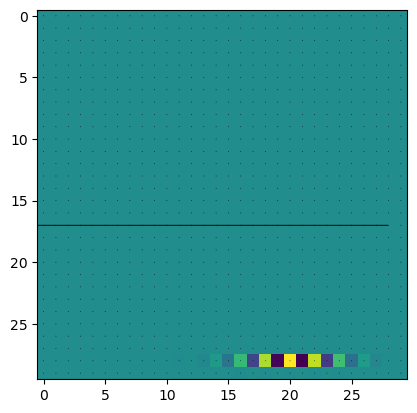

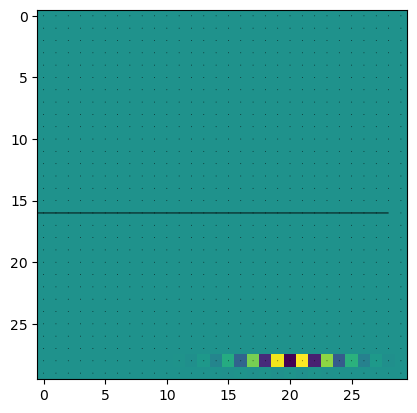

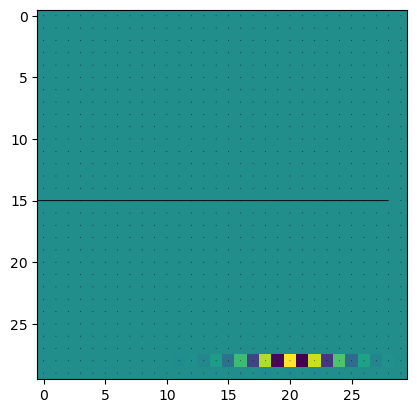

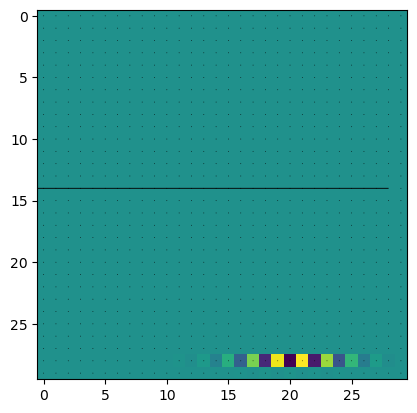

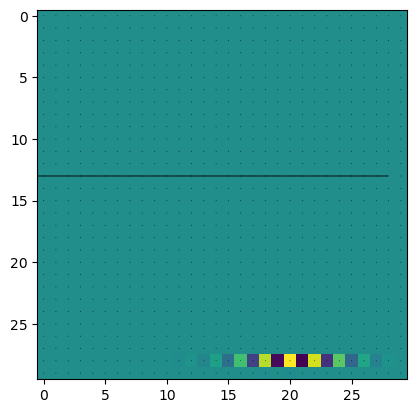

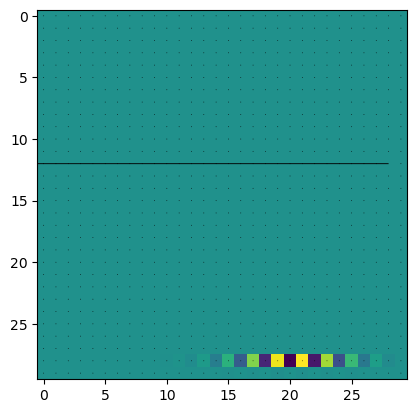

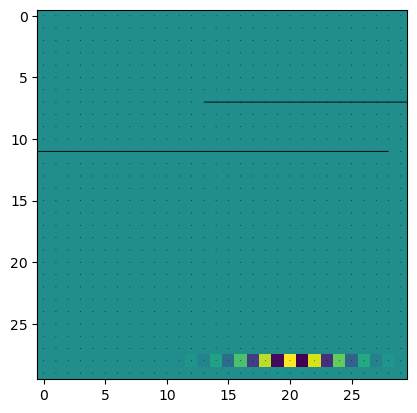

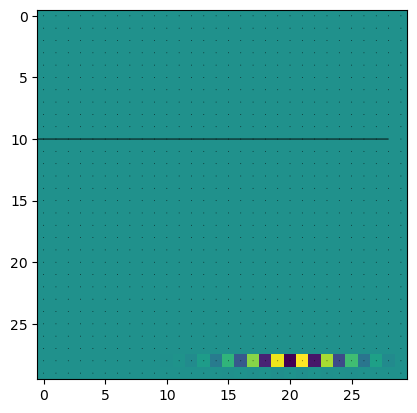

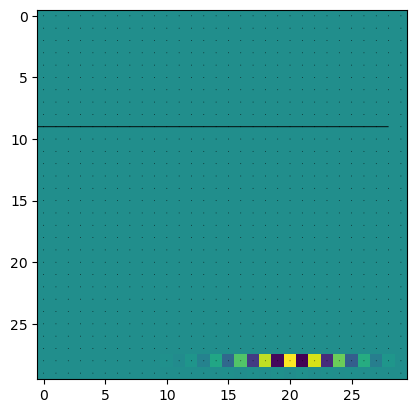

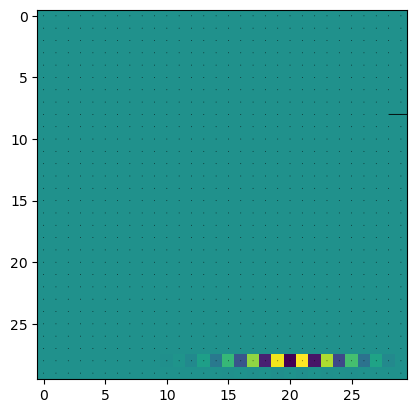

C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:56: RuntimeWarning: overflow encountered in multiply
  - c1 * (rho_u_new[1:-1, 1:-1]*u_new[1:-1, 1:-1] - rho_u_new[1:-1, 1-1:-1-1]*u_new[1:-1, 1-1:-1-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:64: RuntimeWarning: overflow encountered in subtract
  - c1 * (rho_u_new[1:-1, 1:-1]*v_new[1:-1, 1:-1] - rho_u_new[1:-1, 1-1:-1-1]*v_new[1:-1, 1-1:-1-1])


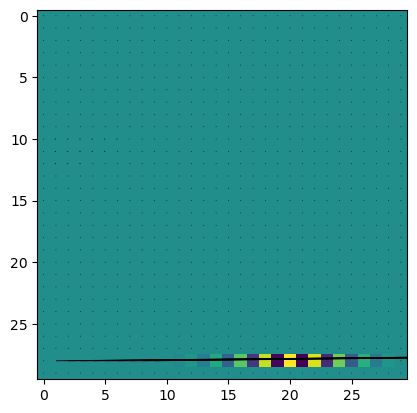

C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:19: RuntimeWarning: overflow encountered in multiply
  -c1*(rho_u[1:-1, 1+1:]*u[1:-1, 1+1:] - rho_u[1:-1, 1:-1]*u[1:-1, 1:-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:21: RuntimeWarning: invalid value encountered in subtract
  + c9 * (v[1+1:, 1+1:] + v[1-1:-1-1, 1-1:-1-1] - v[1-1:-1-1, 1+1:] - v[1+1:, 1-1:-1-1]))
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:18: RuntimeWarning: invalid value encountered in add
  rho_u_new[1:-1, 1:-1] = (rho_u[1:-1, 1:-1] - c3*(rho[1:-1, 1+1:] - rho[1:-1, 1:-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:24: RuntimeWarning: overflow encountered in multiply
  - c1*(rho_u[1:-1, 1+1:]*v[1:-1, 1+1:] - rho_u[1:-1, 1:-1]*v[1:-1, 1:-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:24: RuntimeWarning: overflow encountered in subtract
  - c1*(rho_u[1:-1, 1+1:]*v[1:-1, 1+1:] - rho_u[1:-1, 1:-1]*v[1:-1, 1:-1])
C:\Users\c

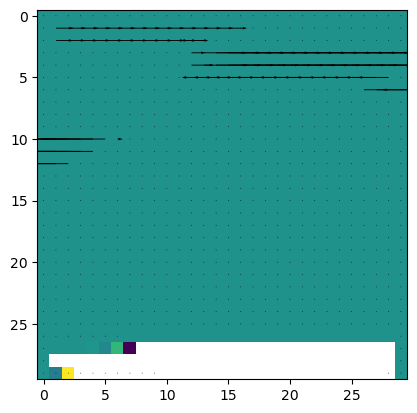

C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:4: RuntimeWarning: invalid value encountered in true_divide
  v = rho_v / rho
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:15: RuntimeWarning: invalid value encountered in subtract
  rho_new[1:-1, 1:-1] = (rho[1:-1, 1:-1] - c1*(rho_u[1:-1, 1 +1:] - rho_u[1:-1, 1:-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:16: RuntimeWarning: invalid value encountered in subtract
  - c2*(rho_v[1+1:, 1:-1] - rho_v[1:-1, 1:-1]))
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:18: RuntimeWarning: invalid value encountered in subtract
  rho_u_new[1:-1, 1:-1] = (rho_u[1:-1, 1:-1] - c3*(rho[1:-1, 1+1:] - rho[1:-1, 1:-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:24: RuntimeWarning: invalid value encountered in subtract
  - c1*(rho_u[1:-1, 1+1:]*v[1:-1, 1+1:] - rho_u[1:-1, 1:-1]*v[1:-1, 1:-1])
C:\Users\caird\AppData\Local\Temp\ipykernel_12016\4215587677.py:39: Runtim

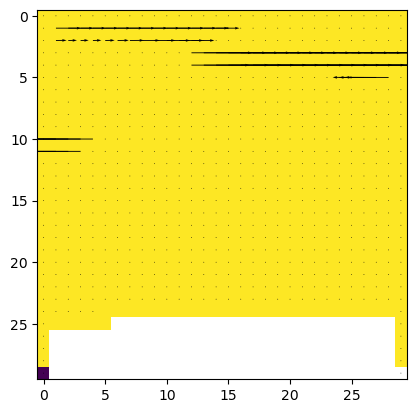

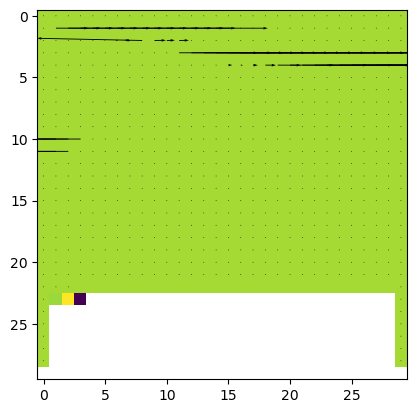

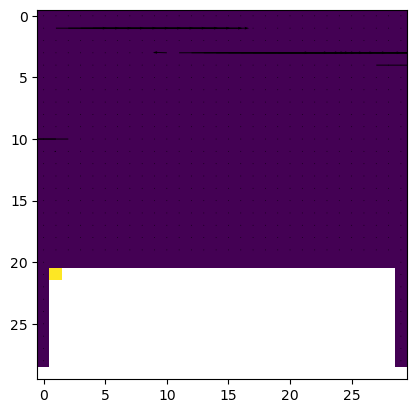

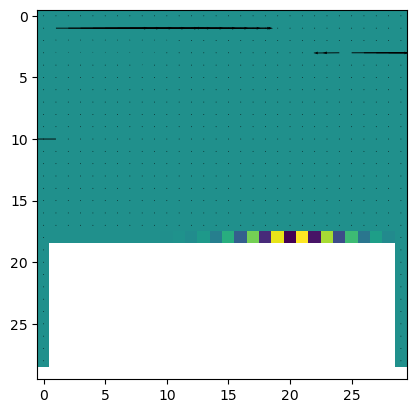

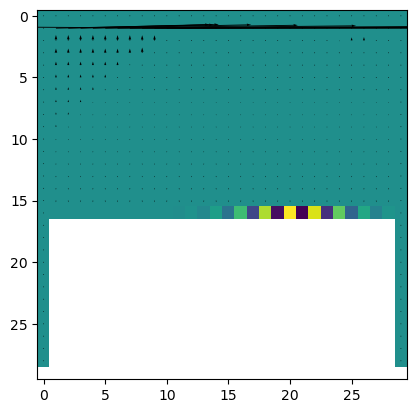

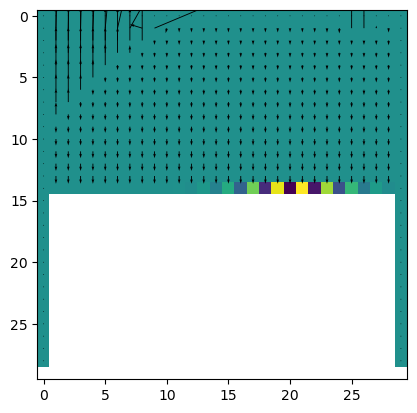

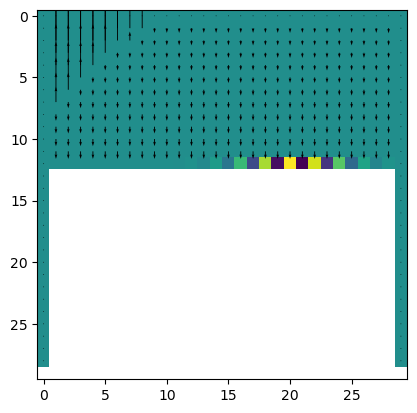

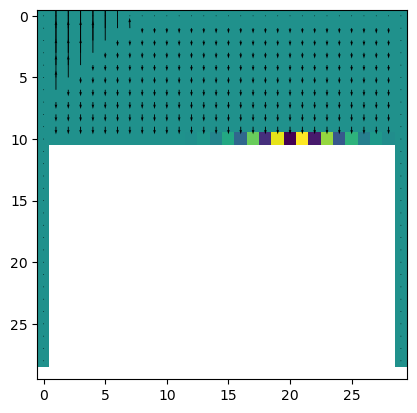

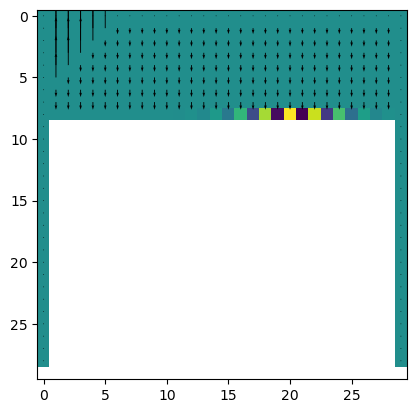

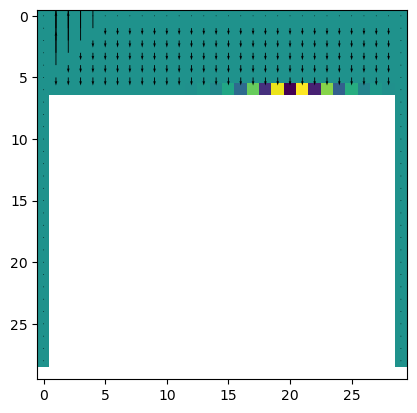

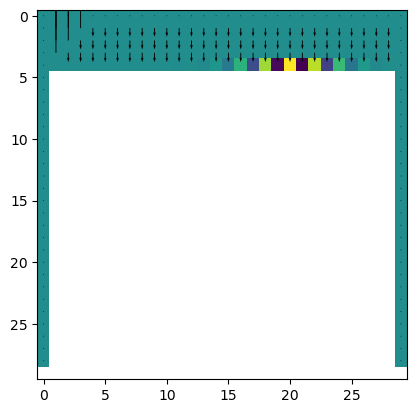

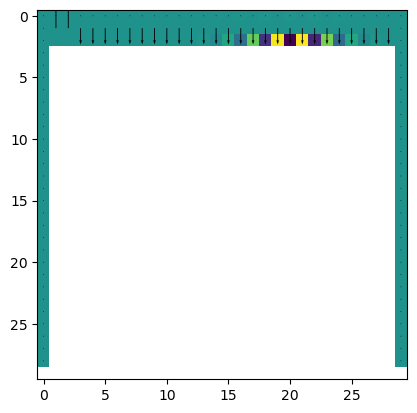

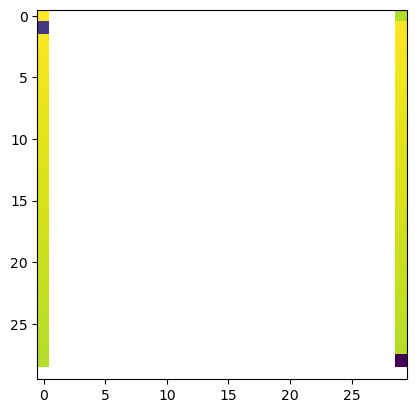

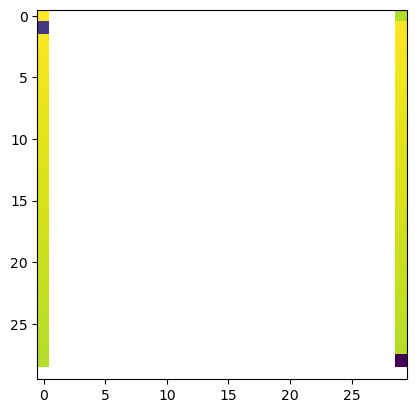

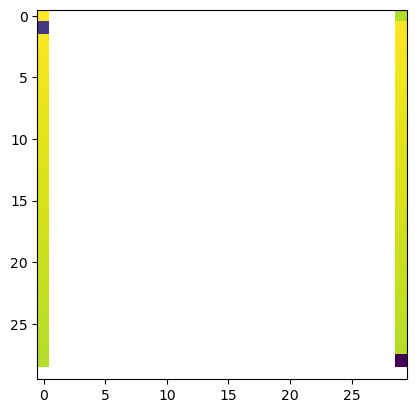

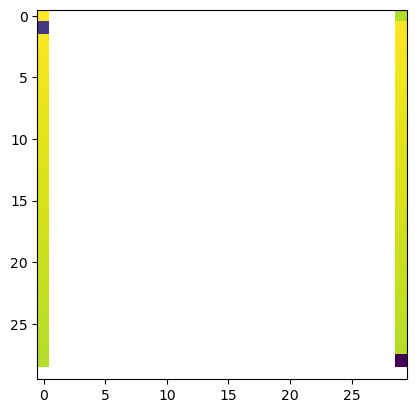

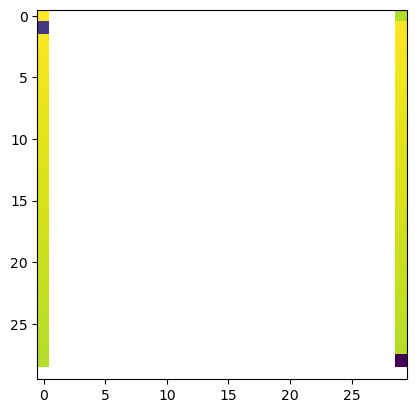

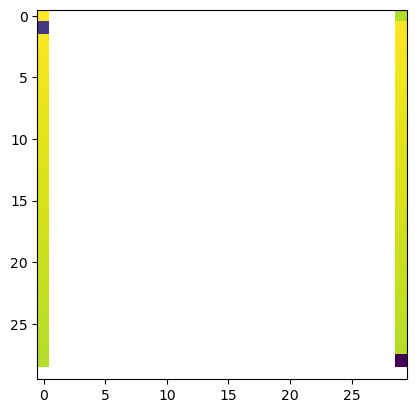

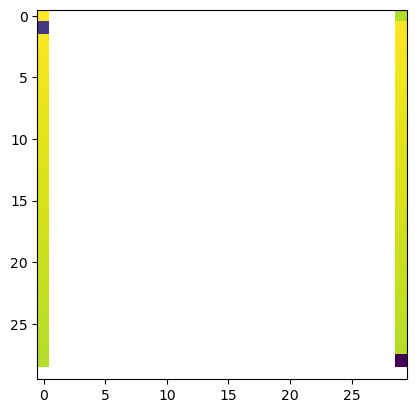

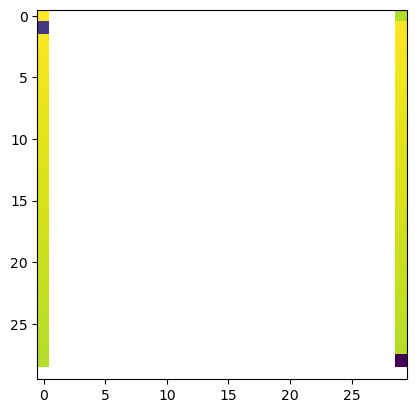

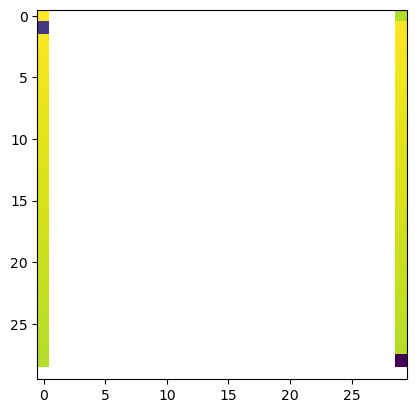

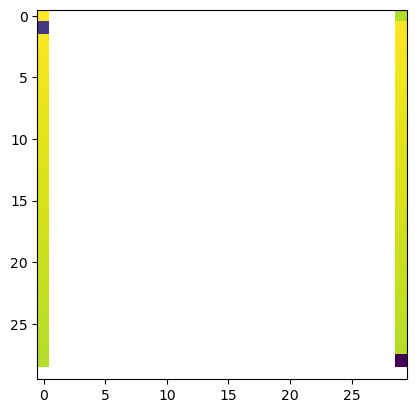

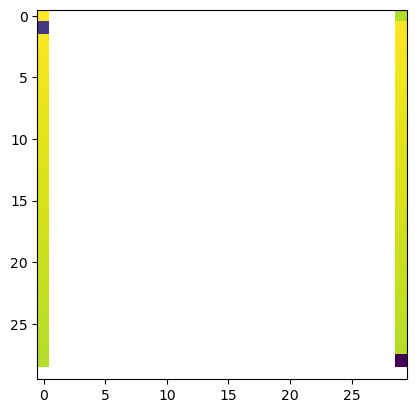

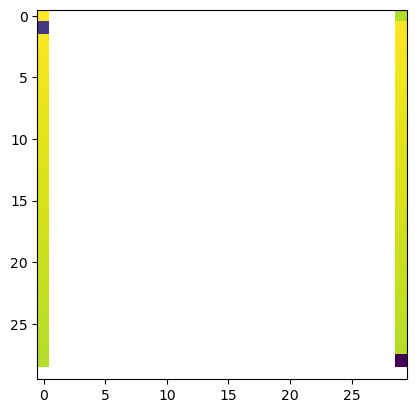

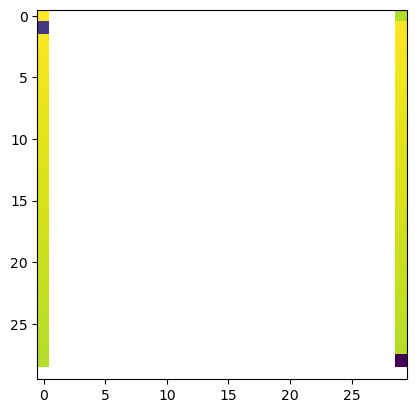

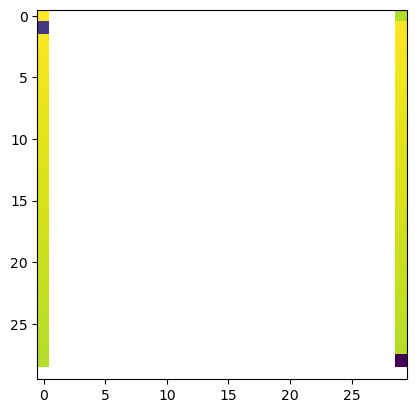

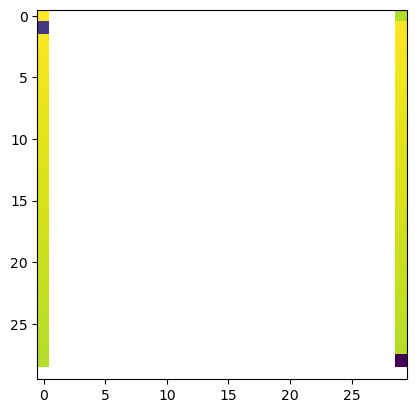

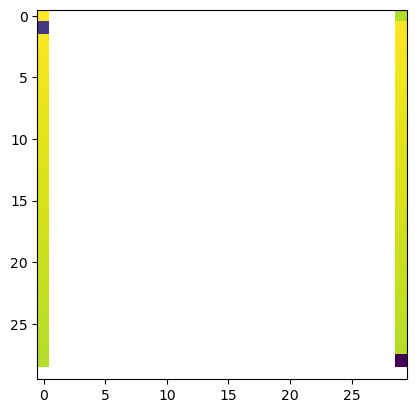

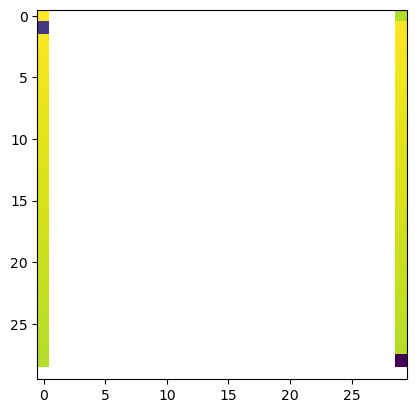

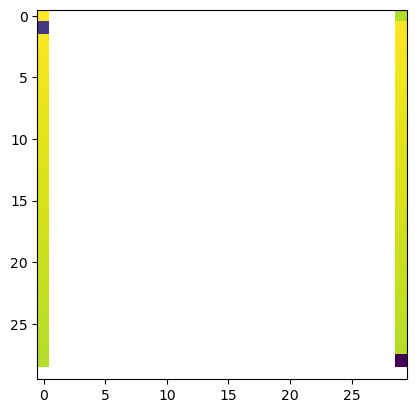

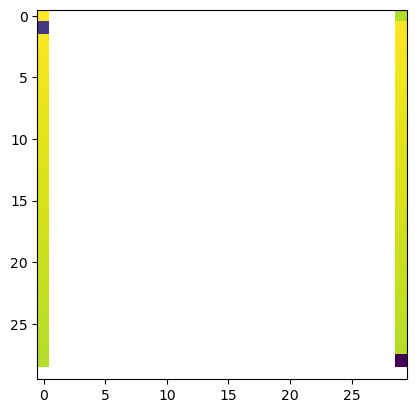

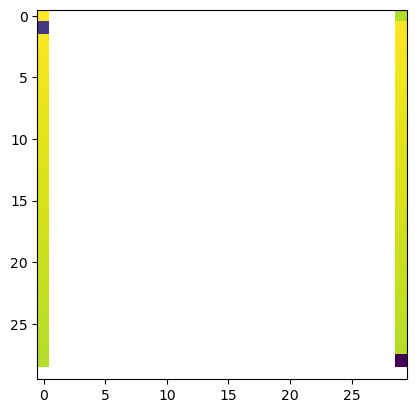

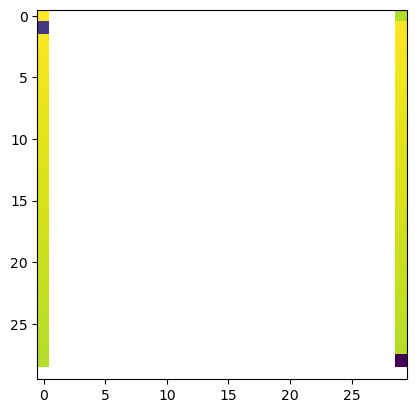

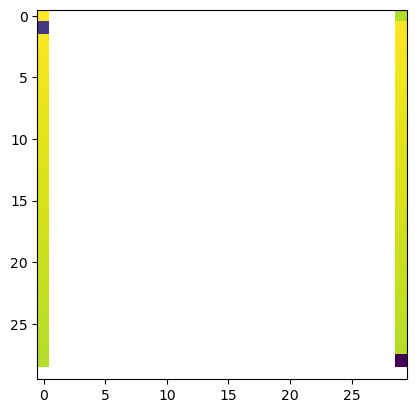

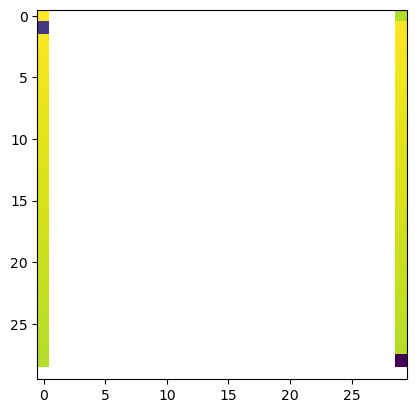

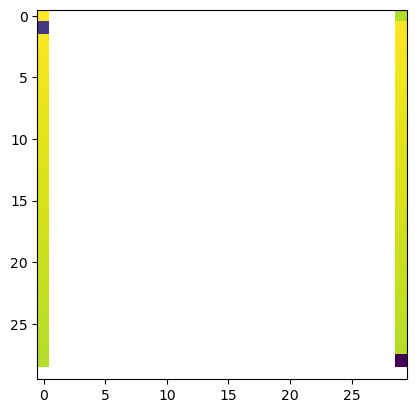

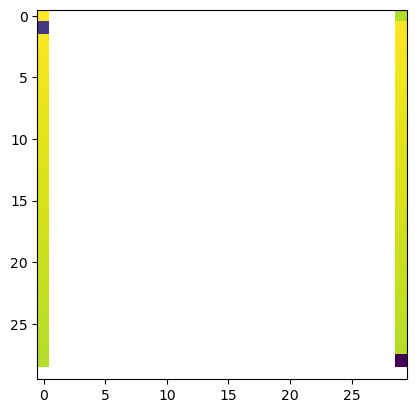

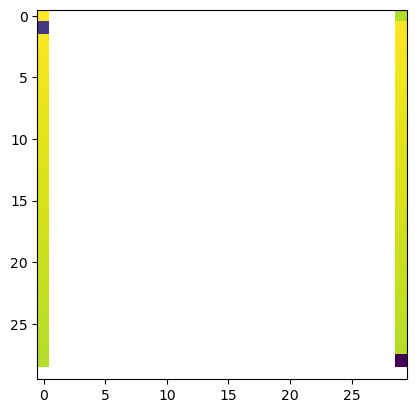

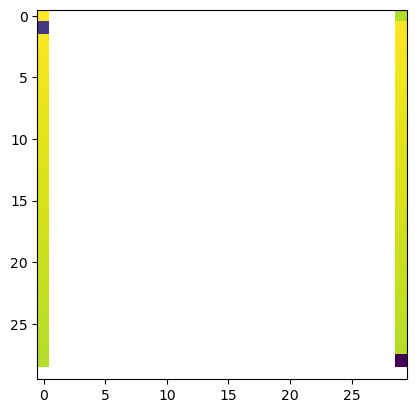

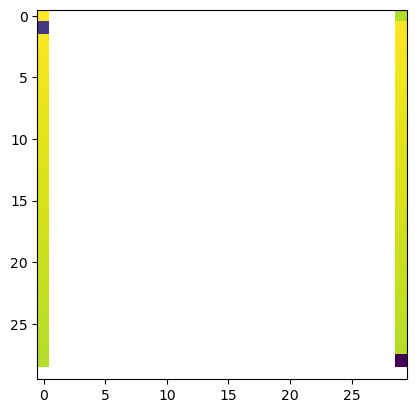

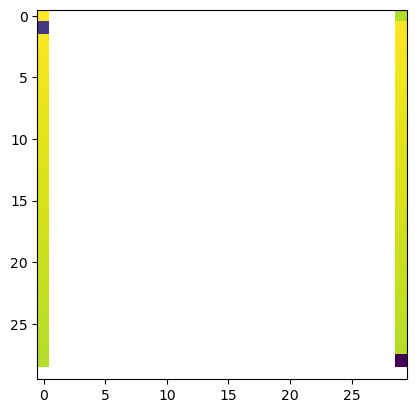

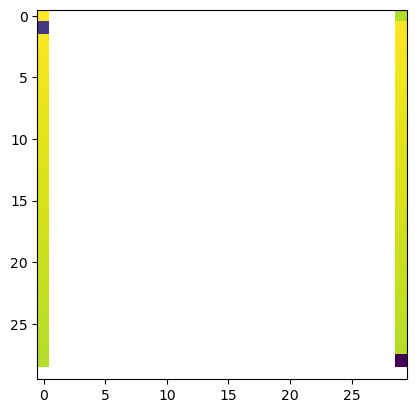

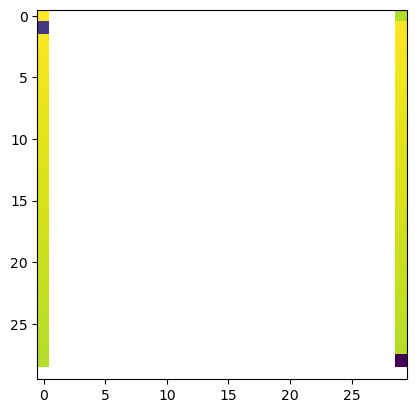

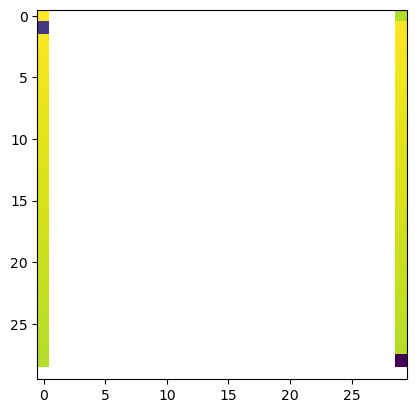

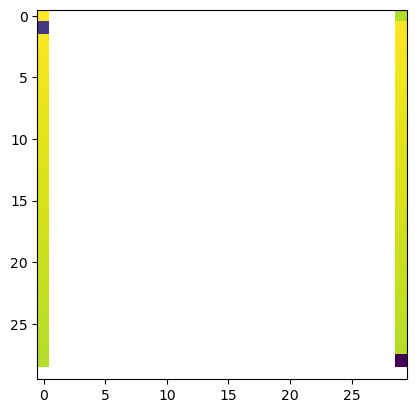

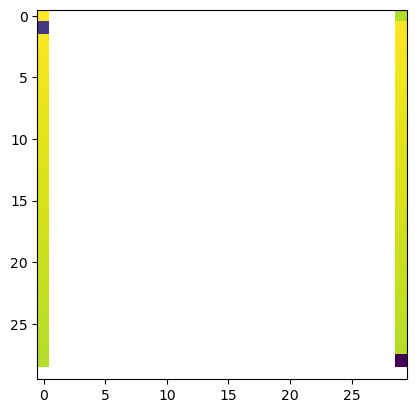

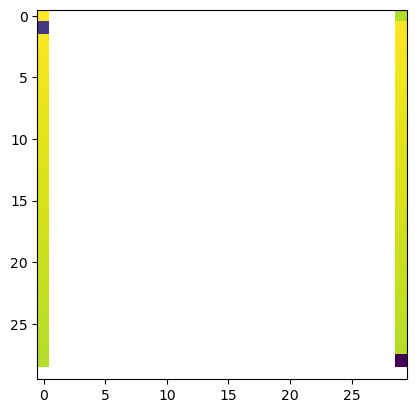

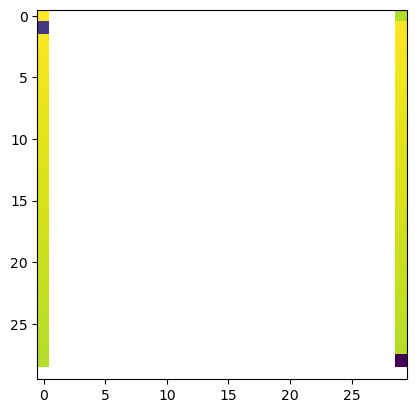

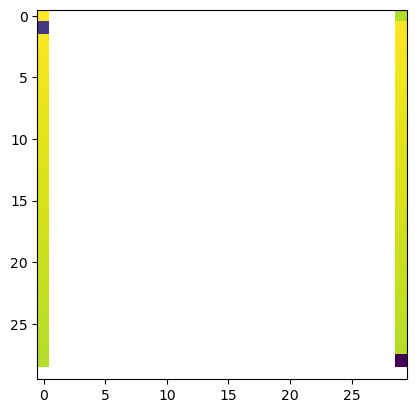

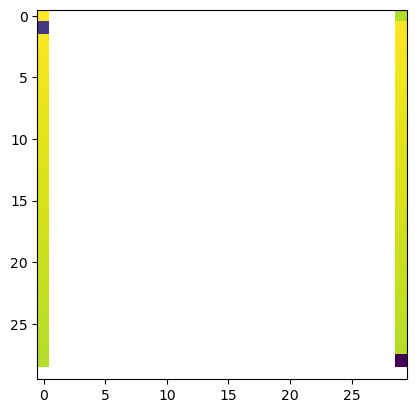

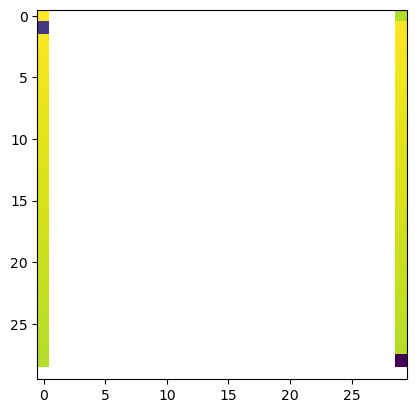

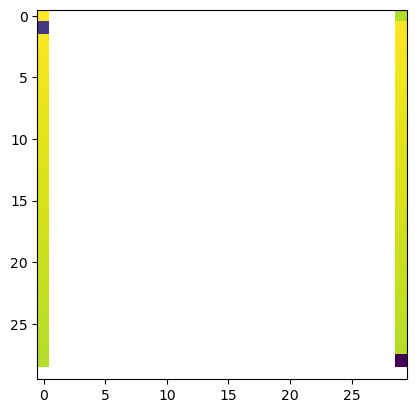

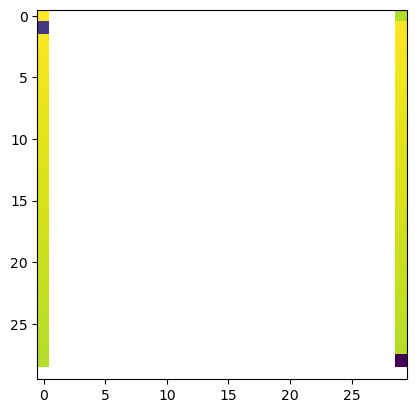

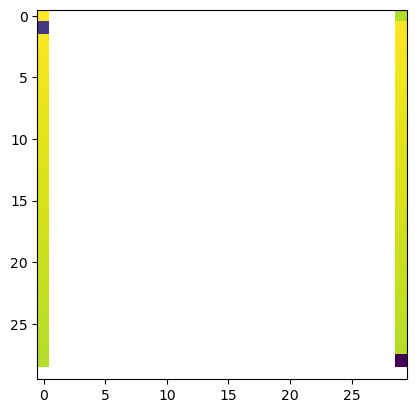

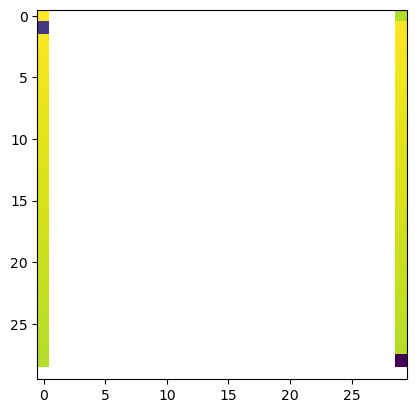

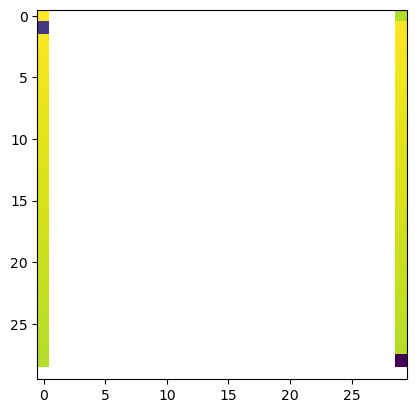

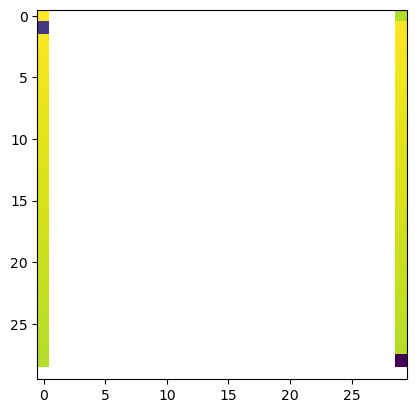

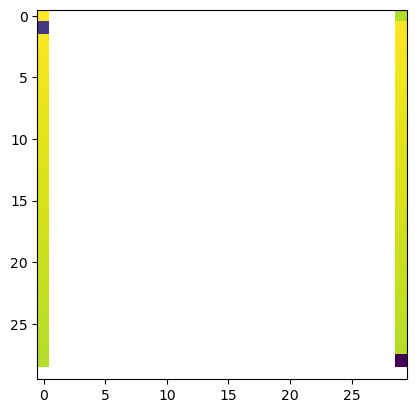

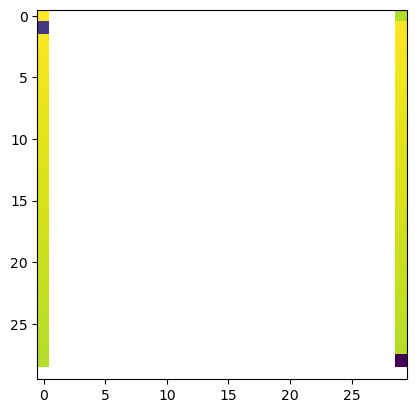

<Figure size 640x480 with 0 Axes>

In [196]:
loop(rho, rho_u, rho_v)